In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['testset.csv', 'trainset.csv']


In [2]:
def modifyDataset(data):
    trainset = data.iloc[:,1:2].values
    return trainset

In [3]:
dataset_train = pd.read_csv("../input/trainset.csv")
trainset = modifyDataset(dataset_train)
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
len(training_scaled)

1259

In [6]:
x_train = []
y_train = []
n_len = 60
for i in range(n_len,len(training_scaled)):
    x_train.append(training_scaled[i-n_len:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [7]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Bidirectional
from keras.layers import LSTM, GRU
from keras.layers import Dropout

Using TensorFlow backend.


In [18]:
regressor = Sequential()
regressor.add(LSTM(units = 1000,return_sequences = True,input_shape = (x_train.shape[1],1)))

regressor.add(LSTM(units = 750,return_sequences = True))

regressor.add(LSTM(units = 600,return_sequences = True))

regressor.add(LSTM(units = 500,return_sequences = True))

regressor.add(Flatten())

regressor.add(Dense(units = 1024, activation = 'relu'))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 256, activation = 'relu'))
regressor.add(Dropout(0.15))

regressor.add(Dense(units = 32, activation = 'relu'))
regressor.add(Dropout(0.05))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam',loss = 'mean_absolute_error')

regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 60, 1000)          4008000   
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 750)           5253000   
_________________________________________________________________
lstm_12 (LSTM)               (None, 60, 600)           3242400   
_________________________________________________________________
lstm_13 (LSTM)               (None, 60, 500)           2202000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              30721024  
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
__________

In [49]:
regressor.fit(x_train,y_train,epochs = 10, batch_size = 64)

Epoch 1/10
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0292
Epoch 2/10
1199/1199 [==============================] - 8s 7ms/step - loss: 0.0286
Epoch 3/10
1199/1199 [==============================] - 8s 6ms/step - loss: 0.0307
Epoch 4/10
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0277
Epoch 5/10
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0282
Epoch 6/10
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0308
Epoch 7/10
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0333
Epoch 8/10
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0334
Epoch 9/10
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0288
Epoch 10/10
1199/1199 [==============================] - 7s 6ms/step - loss: 0.0298


In [50]:
regressor.save_weights('model.hdf5')

In [51]:
regressor.compile(optimizer = 'adam',loss = 'mean_absolute_error')
regressor.load_weights('/kaggle/working/model.hdf5')


In [52]:
dataset_test =pd.read_csv("../input/testset.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-n_len:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [53]:
x_test = []
for i in range(n_len,inputs.shape[0]):
    x_test.append(inputs[i-n_len:i,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [54]:
predicted_price = regressor.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1036.4761 ],
       [1039.677  ],
       [1053.6168 ],
       [1076.0409 ],
       [1084.4764 ],
       [1088.4976 ],
       [1092.6984 ],
       [1084.6208 ],
       [1088.2236 ],
       [1087.9481 ],
       [1109.5869 ],
       [1109.6345 ],
       [1108.0382 ],
       [1105.9794 ],
       [1111.0043 ],
       [1133.0137 ],
       [1155.4403 ],
       [1156.6481 ],
       [1156.5295 ],
       [1158.7423 ],
       [1154.5189 ],
       [1156.79   ],
       [1155.1965 ],
       [1126.803  ],
       [1097.7302 ],
       [1047.5062 ],
       [1077.0046 ],
       [1071.3212 ],
       [1038.6476 ],
       [1050.9851 ],
       [1052.2106 ],
       [1052.7382 ],
       [1071.2478 ],
       [1079.392  ],
       [1080.2577 ],
       [1089.3376 ],
       [1096.924  ],
       [1092.8412 ],
       [1100.3516 ],
       [1108.7234 ],
       [1096.8236 ],
       [1082.4681 ],
       [1041.9546 ],
       [1054.5883 ],
       [1085.5873 ],
       [1088.2874 ],
       [1102.857  ],
       [1122.

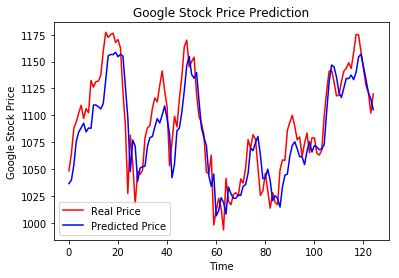

In [55]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()